# Estatísticas de Timbre

## Objetivo

Ao fim desta unidade, o aluno será capaz de utilizar estatísticas de descritores de timbre como um indicador do conteúdo de um arquivo de áudio

## Pré-requisitos

Antes de iniciar esta unidade, o aluno deve sentir-se confortável com a seguinte afirmação:

É possível calcular características objetivas de um espectrograma de forma a caracterizar aspectos de seu conteúdo acústico.

## Vetores

Um vetor é um conjunto ordenado de medidas escalares. Por exemplo, podemos indicar um ponto na superfície terrestre através de um par ordenado $(a, b)$, onde $a$ é a longitude e $b$ é a latitude de um ponto. O mesmo vale para o plano Euclidiano: nele, qualquer ponto pode ser definido por um par $(x, y)$.

Um vetor é, usualmente, denotado por uma letra minúscula em negrito, tal qual $\boldsymbol x$. O $n$-ésmio elemento de um vetor é denotado $x_n$ (sem negrito). Para vetores, valem as seguintes propriedades:

### Soma de vetores
A soma de dois vetores é um vetor composto pela soma de seus elementos correspondentes. Assim, se $\boldsymbol z = \boldsymbol y + \boldsymbol x$, então $z_n = y_n + x_n$.

### Multiplicação por escalar
A multiplicação de um vetor por um número escalar resulta num vetor no qual cada um dos elementos do vetor original foi multiplicado por esse número escalar. Assim, se $\boldsymbol y = a \boldsymbol x$, então $y_n = a x_n$.

### Módulo
O módulo de um vetor é igual ao comprimento da reta que o liga à origem. Para vetores de dimensão arbitrária $N$, a norma $||\boldsymbol x ||$ é dada por:
$$|| \boldsymbol x || = \sqrt{\sum_{n=1}^N x_n^2}.$$

### Distância Euclidiana
A distância Euclidiana entre dois vetores é igual ao módulo de sua diferença, isto é:
$$d(\boldsymbol x, \boldsymbol y) = || \boldsymbol y - \boldsymbol x || = || \boldsymbol x - \boldsymbol y || = \sqrt{\sum_{n=1}^N (x_n-y_n)^2}.$$


In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Demonstrando propriedades de vetores
# Ideia: coloque mais dimensoes nos vetores e veja o que acontece!
x = np.array([4, 3])
y = np.array([3, 4])

print x
print y
print x + y # Soma de vetores
print 10 * x # Multiplicacao por escalar
print np.linalg.norm(y), np.linalg.norm(x) # Modulo de vetores
print np.linalg.norm(y-x), np.linalg.norm(x-y) # Distancia euclidiana

[4 3]
[3 4]
[7 7]
[40 30]
5.0 5.0
1.41421356237 1.41421356237


## Estatística e vetores
Podemos utilizar vetores para registrar uma série de medições de um mesmo fenômeno. Um sinal digitalizado, por exemplo, pode ser considerado um vetor. Assim, é possível tomar um certo conjunto de amostras de dois sinais e calcular sua distância Euclidiana, por exemplo. Na notação que aplicamos para sinais, teríamos:
$$d(\boldsymbol x, \boldsymbol y) = \sqrt{\sum_{n=0}^{N-1} (x[n]-y[n])^2}.$$

Assim, verificamos que vetores e sinais podem ser representados da mesma maneira, e, portanto, podemos aplicar propriedades de sinais em vetores e propriedades de vetores em sinais.

Em vetores, tanto quanto em sinais ou em um conjunto qualquer de números, podemos calcular medidas estatísticas. Elas descrevem como um sinal se comporta ao longo de várias medições, sob um ponto de vista estatístico.

### Média e Variância
A média de um conjunto de amostras é dada por:
$$\mu_x = \frac{\sum_{n=0}^{N-1} x[n]}{N}.$$

A média é o valor $a$ que minimiza a soma dos quadrados das distâncias $(a-x[n])^2$ ao longo de todas as amostras, isto é:
$$\mu_x = \arg \min_a \sum_{n=0}^{N-1} (a-x[n])^2.$$

Ainda assim, sempre que houver qualquer tipo de variação em um sinal $x[n]$, é impossível escolher um valor que leva a soma de todas as distâncias a zero. A medida que indica qual é a dispersão residual é a variância, dada por:
$$\sigma^2_x = \sum_{n=0} ^{N-1} (\mu_x - x[n])^2.$$

A media $\sigma_x = \sqrt{\sigma_x^2}$ é chamada de desvio padrão.

In [10]:
# Demonstrando propriedades de vetores
# Ideia: coloque mais dimensoes nos vetores e veja o que acontece!
x = np.array([-40, -30, 30, 40])
y = np.array([3, 4, -3, -4])
z = np.array([0, 1, -6, -7])

print np.mean(x), np.mean(y), np.mean(z) # Medias
print np.var(x), np.var(y), np.var(z) # Variancias

0.0 0.0 -3.0
1250.0 12.5 12.5


## Normalizando vetores
Uma operação matemática interessante que podemos fazer é a de normalizar vetores. Esta operação resulta em um vetor com média zero e variância unitária. O vetor $\boldsymbol x_{\mbox{normalizado}}$ pode ser calculado por:
$$\boldsymbol x_{\mbox{normalizado}} = \frac{\boldsymbol x-\mu_x}{\sigma_x}.$$


In [41]:
x = np.array([4, 3, 2, 4, 3.2, 1, 2, 90, 1, 2, 3, 4])
x_norm = (x - np.mean(x))/np.sqrt(np.var(x))
print np.mean(x), np.mean(x_norm)
print np.var(x), np.var(x_norm)

9.93333333333 4.62592926927e-18
583.848888889 1.0


## Análise estatística de descritores de áudio

Nesta análise, vamos verificar como as estatísticas de descritores de áudio podem ser utilizadas para identificar, de forma objetiva, o conteúdo de descritores.

No código que segue, calcularemos o flatness espectral ao longo de quadros de curta duração de três trechos de áudio, contendo, respectivamente uma percussão, uma guitarra e um coral. Após, mostraremos os valores calculados em um histograma.

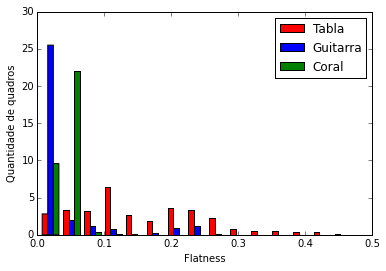

In [23]:
import mir3.modules.tool.wav2spectrogram as spectrogram
import mir3.modules.features.flatness as flatness

fnames = ['audio/tabla.wav', 'audio/bbking.wav', 'audio/chorus.wav']
flat_samples = []
for fname in fnames:
    wav2spec = spectrogram.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
    s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

    fness = flatness.Flatness()
    f = fness.calc_track(s)
    flat_samples.append(f.data)
    
plt.figure();
plt.hist(flat_samples, 15, normed=1, histtype='bar',
                            color=['red', 'blue', 'green'],
                            label=['Tabla', 'Guitarra', 'Coral']);
plt.xlabel('Flatness');
plt.ylabel('Quantidade de quadros');
plt.legend(loc=1);

Podemos, neste momento, detectar alguns comportamentos interessantes:
* O flatness do coral permanece o tempo todo abaixo de 0.1
* Embora o flatness da guitarra seja, em geral, baixo, também pode subir para valores mais altos
* O flatness da tabla tem uma dispersão muito grande entre 0 e 0.45.

Veja que essas observações indicam que a média (a tendência geral) e a variância (dispersão) podem ser boas formas de descrever esses histogramas em uma forma mais compacta


In [35]:
m = []
s =[]

for a in xrange(3):
    m.append(np.mean(flat_samples[a]))
    s.append(np.var(flat_samples[a]))
    
    print fnames[a], np.mean(flat_samples[a]), np.var(flat_samples[a])

audio/tabla.wav 0.155202153754 0.0090709168779
audio/bbking.wav 0.0347740529661 0.00341338915218
audio/chorus.wav 0.0396387161756 7.68322195159e-05


É importante perceber que este procedimento permite relacionar arquivos de áudio a um vetor, de tantas dimensões quanto se queira (poderíamos expandir este procedimento para incluir outros descritores, por exemplo).

Esses vetores podem ser mostrados numa figura:

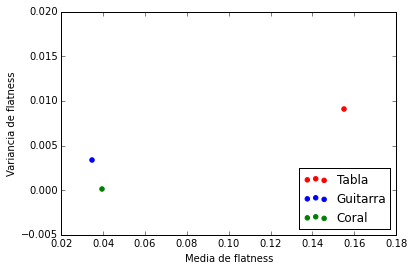

In [36]:
color=['red', 'blue', 'green']
label=['Tabla', 'Guitarra', 'Coral']
plt.figure();
for a in xrange(len(m)):
    plt.scatter(m[a], s[a], color=color[a], label=label[a])
plt.xlabel('Media de flatness')
plt.ylabel('Variancia de flatness')
plt.legend(label, loc=4);
plt.show()

## Generalização

Até o momento, mostramos como relacionar arquivos de áudio a vetores, mas não há nenhuma prova de que esses vetores são representativos quanto ao conteúdo acústico que utilizamos como base. Vamos começar esse processo de forma anedotal, utilizando o arquivo de áudio que foi usado como exercício na unidade anterior. Calcularemos a média e a variância de seu flatness espectral ao longo do tempo, e então mostraremos como o vetor resultante se relaciona com os anteriores. 

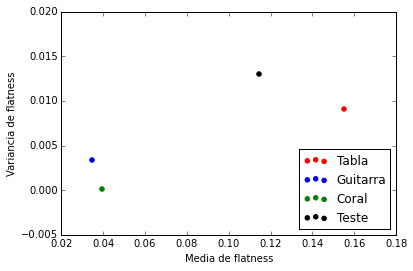

In [38]:
wav2spec = spectrogram.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
spec = wav2spec.convert(open('audio/testing.wav', 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')
fness = flatness.Flatness()
f = fness.calc_track(spec)
m.append(np.mean(f.data))
s.append(np.var(f.data))

color=['red', 'blue', 'green', 'black']
label=['Tabla', 'Guitarra', 'Coral', 'Teste']
plt.figure();
for a in xrange(len(m)):
    plt.scatter(m[a], s[a], color=color[a], label=label[a])
plt.xlabel('Media de flatness')
plt.ylabel('Variancia de flatness')
plt.legend(label, loc=4);
plt.show()

Podemos visualizar que o ponto de teste parece mais próximo do vetor da Tabla que dos demais. Podemos calcular essa distância:

In [40]:
for i in xrange(3):
    print label[i], np.linalg.norm( np.array([s[-1]-s[i], m[-1]-m[i]]))

 Tabla 0.0407415035393
Guitarra 0.0804584376464
Coral 0.0761276337005


Portanto, o ponto está mais próximo de nossa referência para o som de tabla que dos demais.

## Inteligência Computacional
Neste ponto, o problema de classificação de sons por computador foi reduzido a um problema de classificação vetorial, para o qual é possível utilizar diversas técnicas de inteligência computacional. Há diversos cursos de inteligência computacional disponíveis online, mas recomendo este;

http://www.github.com/tiagoft/inteligencia_computacional

As duas primeiras unidades do curso são especialmente úteis. Em especial, é recomendável que o aluno consiga utilizar bem a biblioteca sklearn e entenda como utilizar processos de classificação por K Vizinhos Mais Próximos (KNN - K Nearest Neighbours).

# Exercícios
1. Modifique o código computacional fornecido de forma a utilizar outros descritores, já vistos em aula.
 1. Quais deles parecem mais eficazes para separar quais tipos de sons (por exemplo: há algum descritor de acordo com o qual a distância entre o a guitarra e a tabla seja significativamente maior que a distância entre esses dois elementos e o coral?). 
 1. Considere também os arquivos audio/chirp.wav e audio/piano.wav, que contém, respectivamente, um glissando e uma nota de piano. Utilizando descritores e medidas objetivas, defina se eles se parecem mais com um coral, uma guitarra ou uma tabla. Essa resposta muda, dependendo dos descritores que forem utilizados?